Attempting to Determine a Threshold for Similarity between 10Qs and a sample legal document 

In [6]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from nltk import tokenize
import seaborn


### Download Universal Sentence Encoder 

In [8]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [120]:
"""
Sentences from Apple 10Q
"""

sentences = []
doc_text = open(f"../resources/filtered/87.txt").read()
doc_sent = tokenize.sent_tokenize(doc_text)
sentences += doc_sent
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

In [121]:
"""
Sentences from the bank of forward-looking statements
"""

legal_sents = []
legal_text = open(f"../resources/forward_looking.txt").read()
legal_sents = tokenize.sent_tokenize(legal_text)
legal_non_empty = [sentence for sentence in legal_sents if len(sentence) > 0]


In [122]:
"Sentences from sample legal document"

'Sentences from sample legal document'

In [123]:
logging.set_verbosity(logging.ERROR)

doc_vectors = embed(non_empty)
legal_vectors = embed(legal_non_empty)

In [124]:
from sklearn import metrics
cosine = metrics.pairwise.cosine_similarity(doc_vectors, legal_vectors)


In [125]:
# for each document sentence, obtain the highest similarity score it has 
score_maxes = np.amax(cosine, axis=1)





# Exploring Cosine Similarity

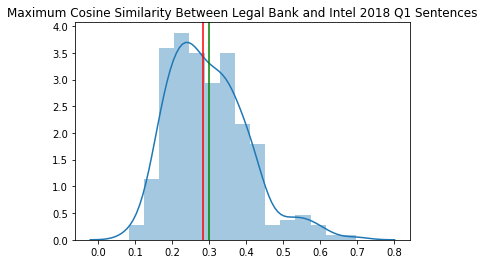

In [126]:
## plot histogram 
# sns.distplot()

sns.distplot(score_maxes)
doc_name = "Intel 2018 Q1"
plt.title("Maximum Cosine Similarity Between Legal Bank and " + doc_name + " Sentences")
plt.axvline(np.median(score_maxes), color = 'r')
plt.axvline(np.mean(score_maxes), color = 'g')
plt.xticks(np.arange(0.0, 0.9, 0.1))
plt.show()



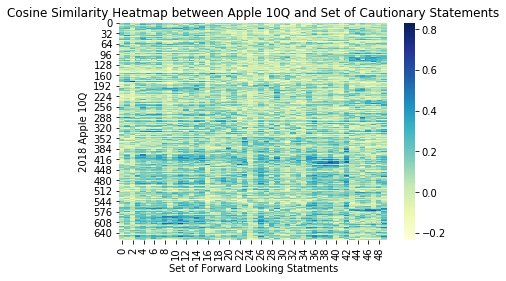

In [96]:
# %matplotlib ipympl

sns.heatmap(cosine,cmap="YlGnBu")

plt.title("Cosine Similarity Heatmap between Apple 10Q and Set of Cautionary Statements")
plt.ylabel("2018 Apple 10Q")
plt.xlabel("Set of Forward Looking Statments")

plt.show()


In [97]:
thresh = 0.9
idcs = np.where(np.logical_and(cosine > 0.28, cosine < 0.3))
np.shape(idcs)
idcs
# print(non_empty[6])

(array([  2,   3,   9,   9,   9,  13,  18,  18,  23,  23,  33,  37,  38,
         39,  40,  41,  47,  48,  48,  50,  53,  53,  58,  58,  65,  65,
         66,  68,  72,  73,  73,  75,  76,  80,  84,  84,  84,  89,  91,
         95, 100, 100, 102, 104, 107, 107, 108, 109, 114, 115, 116, 117,
        117, 121, 122, 122, 124, 124, 124, 124, 124, 124, 124, 129, 137,
        142, 151, 154, 154, 156, 156, 156, 156, 157, 157, 157, 157, 162,
        164, 165, 165, 165, 165, 169, 174, 182, 182, 183, 183, 185, 185,
        186, 188, 189, 189, 193, 195, 198, 198, 198, 199, 199, 199, 200,
        200, 202, 203, 203, 203, 208, 208, 209, 219, 223, 237, 241, 241,
        243, 245, 251, 252, 252, 254, 254, 254, 254, 254, 254, 254, 259,
        259, 260, 261, 262, 262, 262, 262, 263, 265, 266, 268, 276, 278,
        278, 281, 281, 282, 284, 284, 286, 290, 290, 291, 293, 298, 298,
        300, 302, 303, 303, 303, 309, 309, 315, 318, 318, 319, 320, 320,
        320, 320, 324, 325, 326, 327, 327, 327, 328

In [22]:
print(non_empty[26])

Sales to certain of these distributors are made under agreements that allow such distributors to receive price-adjustment credits, as discussed below, and to return qualifying products for credit, as determined by the Company, in order to reduce the amounts of slow-moving, discontinued or obsolete product from their inventory.
